<a href="https://colab.research.google.com/github/IntroComputationalPhysics-UNT/kapitza-pendulum-Skates-b/blob/main/kapitza_pendulum_finalassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview & Pseudocode
---

Overall objectives for this assignment:

1. Design our own stability diagnostic for this pendulum.
2. Map the long-time behavior vs the parameters.
3. Produce a 2D stability plot.

---
Pseudocode:
1. **Install the necessary libraries:** CHECK
2. **Define our dimensionless quantities and parameters:**
3. **Define our equation of motion and other functions:**
4. **Design a stability diagnostic:**
5. **Map the long time behavior vs parameters:**
6. **Graph a 2D stability plot:**

## ***To Do List:***

**Github requirements:**
1. Justify our stability diagnostic:

    a. Choose initial conditions to represent the inverted state (*what is inverted state?*)

    b. Determine how to quantify long time behavior, decide how long to integrate, etc.

    c. JUSTIFY!!! STABILITY DIAGNOSTIC!!!

2. Make a sweep function for epsilon next to alpha for one fixed zeta

    a. for each point, determine stability indicator of these functions according the the stability diagnostic

3. PLOT

    a. Make a plot with ϵ on the x-axis and α on the y-axis, where color (or contours) shows your long-time response measure.

    b. From this data, extract an approximate stability boundary α_c(ϵ) separating stable and unstable behavior.

    c. Propose a simple functional form for this boundary (for example, α_c(ϵ)≈C ϵ^2).

    d. Superimpose your guessed curve on top of the 2D plot and comment briefly on how well it matches your numerical results.

---
**Personal Coding Notices:**

1. Determine the actual parameter values (placeholders currently =1)

    Specifically: Gamma, y_p (which I thought is vertical position but double check), and... w_d because I think I can change it? w_d is the applied frequency(?*) and w_0 is the natural frequency (which, do I decide that??? am I God in this coding space?)

    Length "l" can remain = to 1.

2. ✅ define the epsilon_critical function (also, double check alpha_critical function)
3. fix whatever is going on with the kapitza function??? something seems off.
4. Figure out how to make a map and literally everything about plotting I would say
5. Reorganize the information and the coding so that you only have to click a few buttons to run things



**OK, STOP!**

Let's do some visualization of what is happening!

Video ref.: https://youtu.be/cjGqxF79ITI

We will have two stability points with this kapitza pendulum, one when it is vertically and one when it is vertically up when a certain frequency is applied to it. SO... that's what we are figuring out via dimensionless quantities. Which is why we're using pi and stuff like that... Unless you think about it like a pi chart, then it would be pi/2 and 3 pi/2... Maybe I can work with that since it's easier to visualize?

## Step 1 and 2


### **Install the nescessary libraries:**

We would like to import `numpy as np` for basic arthimatic, `matplotlib.pyplot as plt` for plotting, and `solve_ivp` from `scipy.integrate` for solving our ODE for the equation of motion.

In [1]:
# associated code; installing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### **Define our dimensionless quantities and parameters:**

Dimensionless quantities:

The angular frequency is represented by `w_d` which is equal to 1.
The natural frequency is represented by `w_0` equal to 1.
The damping coefficient is represented by `gamma` equal to 1.
The vertical position of the pivot point is represented by `y_p` equal to 1. (or, the amplitude of the vertical oscillation of the pivot).
The length of the pendulum is represented by `l` equal to 1.

---

There are several parameters that are used, and we can narrow some down into these three.*

The dimensionless damping is represented by `zeta` or `z` which is equal to `gamma / w_d`.
The dimensionless angular frequency is represented by `epsilon` or `ep` which is equal to `w_0/w_d`.
The fractional displacement of the pivot point is represented by `alpha` or `a` which is equal to `y_p/l`.

Finally, our new parameter in terms of redefining time is `tau` or `T` which is equal to `w_d t`.

---

We would like to find the relationship between these three parameters.
`f(ep,a,z) > 1` due to the condition that `e^2 > a` can be expressed as `(w_0^2 * l / y_0 * w_d^2) = ep^2 / a` is greater than 1.

In [3]:
# associated code;
w_d = 1
w_0 = 1
gamma = 1
y_p = 1
l = 1
# the three parameters
zeta = z = gamma/w_d
epsilon = ep = w_0/w_d
alpha = a = y_p/l
# dimensionless time conversion
t = 1 # time??? CHECK CHECK CHECK
tau = T = w_d * t

# relationship condition between the three parameters
f = (ep**2 / a) # CHECK CHECK CHECK CHECK LATER***
print(f)

# OTHER
theta = np.pi # CHECK CHECK CHECK CHECK

1.0


## Step 3 and 4

### **Define our equation of motion and other functions:**
We will define a function for the equation of motion for the kapitza pendulum called `kapitza_pen` with parameters: $$\tau, y, \epsilon, \alpha, \zeta$$ using the dimensionlesss equation of motion:
$$\theta" + 2 \zeta \theta ' + (\epsilon ^2 - \alpha cos(\tau)) sin(\theta) = 0$$
or
$$\theta'' = -2 \zeta \theta' - (\epsilon^2 - \alpha cos(\tau))sin(\theta)$$

---

We'll also define a function to find the boundaries of the inverted space: holding `ζ` and `ϵ` cosntant while sweeping `α`. We'll call this function `alpha_critical` since we're trying to find those boundaries.

In [4]:
### FUNCTIONS
# Equation of Motion ODE
def kapitza_pendulum(tau, y, epsilon, alpha, zeta):
	"""
	This function defines the equtation of motion for a Kapitza pendulum
	PARAMETERS:
	tau : float, ndarray
		dimensionless time : tau = omega_d * t
	y : ndarray
		state variables [theta, ang_vel]
	alpha : float
		relative displacement of the pivot to the pendulum arm : alpha  = y_0/l
	epsilon : float
		dimensionless frequency : epsilon = omega_0/omega_d
	zeta : float
		dimensionless damping coefficient : zeta = gamma/omega_d

	RETURNS:
	dy/dtau : ndarray
		time derivitives of state variables
	"""
	theta, ang_vel = y # unpack state variables
	dtheta_dtau = ang_vel #define the angular velocity
	d2theta_dtau2 = -2 * zeta * dtheta_dtau - (epsilon**2 - alpha * np.cos(tau)) * np.sin(theta)
	dy_dtau = np.array([dtheta_dtau, d2theta_dtau2]) # pack variables
	return dy_dtau

# LINE BREAK LINE BREAK LINE BREAK LINE BREAK LINE BREAK LINE BREAK LINE BREAK LINE BREAK LINE BREAK
# finding the boundaries of the inverted space
# our guess for the boundary of the inverted state
def alpha_critical(epsilon, zeta, coef, alpha):
	"""
	This function defines the boundary of the inverted state
	PARAMETERS
	epsilon : float
		dimensionless frequency : epsilon = omega_0/omega_d
	zeta : float
		dimensionless damping coefficient
	coef : float
		tuning parameter to help with fit
	RETURNS:
	alpha : float
		relative displacement of the pivot to th ependulum arm : alpha = y_0/l
	"""
	alpha = coef*epsilon**2 # our (unjustified) guess at the moment; omits zeta --> needs updating
	return alpha

# NEW FUNCTION JUST DROPPED!!!
# this is our epsilon sweep function
def epsilon_critical(alpha, zeta, coef, epsilon):
	"""
	This function defines the boundary of the inverted state (epsilon)
	PARAMETERS
	alpha : float
		relative displacement of the pivot to the ependulum arm : alpha = y_0/l
	zeta : float
		dimensionless damping coefficient
	coef : float
		tuning parameter to help with fit
	RETURNS:
	epsilon : float
		dimensionless frequency : epsilon = omega_0/omega_d
	"""
	epsilon = coef * alpha**2 # unjustified guess based on alpha critical; zeta held constant
	return epsilon


### **Design a stability diagnostic:**

This will be our stability diagnostic.
$$\theta = \frac{1}{T} \int \theta(t)dt$$

It will be stable if:
$$|\theta - \pi|<\delta$$

---

*Why this particular stability diagnostic? What does it mean and how does it work?*


In [5]:
from scipy import integrate
# associated code; defining stability diagnostic
def stability_diagnostic(theta, delta):
  """
  This function defines the stability diagnostic for the Kapitza pendulum
  PARAMETERS
  theta : float
    This is the integral of something something...
  delta : float
    How stable it is??? The closer to... pi it gets, the more stable it is???
  """
  theta_T = 1/T * integrate(theta)
  if abs(theta - np.pi) < delta:
    return True
  else:
    return False

## Step 5 and 6

### **Map the long time behavior vs parameters:**

Solve the ODE and compare numbers numerically. Then create a map?

---

For this we need to define a few things. First, we need to set our input parameters `alpha`, `epsilon`, `zeta`, all of which should be less than 1 for now.
We'll define a number of decay times, `n_decay`, we want to integrate over.
We need to define a dimensionless time span, `tau_min =0`. `tau_max = n_decay/(2*zeta)`, and `tau_span = [tau_min, tau_max]`.

Next, we'll need to define an initial state for our pendulum.
`delta_theta = 0.01` is our deviation of theta from pi. `theta_0 = np.pi - delta_theta` is our theta value. `ang_vel_0 =0` is the initial angular velocity of the pendulum. `y_0 = [theta_0, ang_vel_0]` is the initial position???*

Finally, we'll solve the `kapitza_pendulum` with our `solve_ivp`.

---
Next, we need to sweep through our parameter values while solving the ODE. We will use function `alpha_critical` to find values of `alpha` that may point toward stability while holding `zeta` and `epsilon` constant. We'll do the same with `epsilon_critical` except hold `alpha` constant instead to find values of `epsilon`.

Then, we will need to map out the long time behavior of the function versus the parameters. [how to do map???]

---
**UPDATE: 11/26/25**
I have asked AI to help with this step and generate a heat map. I have transferred all the code to my personal notebook and will be painstakingly working through it. The simulation runs were long and the maps did appear, though the end result was less than ideal. Still, I have a better idea of how the process works. Nested loops for our critical functions are actually... smart? Idk, we'll see.

In [ ]:
# associated code
# input parameters ; these things are used in our crit. functions
  # why would we have these defined at some input? Like... what's the point of having the non-dimensionless parameters in our code and having them mean something?
alpha = 0.99
epsilon = 0.99
zeta = 0.99

# time parameters ; idk what we're using this for, tau and time are confusing me ngl (BUT I DO KNOW WE NEED A TIME SPAN)
  # this will tell Don (my code) how long to integrate and solve solutions for in some way (once i build that?)
n_decay = 100
tau_min = 0
tau_max = n_decay/(2*zeta)
tau_span = [tau_min, tau_max]
# TIME ALTERNATE
t_min = 0
t_max = n_decay/(2*zeta)
t_span = [t_min, t_max]

# initial pendulum state ; this is the physical position of the kapitza pendulum as it starts!!!
delta_theta = 0.01 # this is... the minute change we have because if we just had it in the pi direction it wouldn't move...
theta_0 = np.pi - delta_theta # this is our initial angle of our pendulum!
ang_vel_0 = 0 # this is the initial angular velocity
y_0 = [theta_0, ang_vel_0] # the initial amplitude of the vertical oscillation of the pivot point (y_p)
  # it's kinda catagorized by it's velocity and it's angle to the vertical... which we set as pi, for some reason, when there's a perfectly good unit circle?

# solve the ODE equation of motion!!!
solution = solve_ivp(kapitza_pendulum, tau_span, y_0, args=(epsilon, alpha, zeta))


### **MAPPING BEHAVIOR AND PARAMETERS**
So, Donnatello (what I am calling the AI, let me have my fun) developed a step-by-step guide on what it was doing.

1. First, Donnatello seems to have a problem with my stability diagnostic. That will be changed to correctly evaluate the long-term behavior.

2. We need to perform a parameter sweep, which Donnie used nested loops? And using a grid of alpha and epsilon values, which makes sense to me.

3. *Running Simulations and Evalutating Stability:* This is where the magic happens. We have our kapitza function, sweeping functions, and the stability diagnostic function working together.

4. *Generating 2D plot:* This one is more of the last step, but it does involve making the heat map, so we'll focus on the HEAT MAP aspect.



#### **First: Fixing Stability Diagnostic**

Based on Donnie's code, the stability diagnostic will be a function of `theta_solution` and `delta`.

`theta_solution` is an array of angular positions (theta) from the solve_ivp result. I think I'll rename it to be `theta_sol`.

`delta` is the tolerance value, which makes more sense since we're finding the stable values? Idk, this just feels like the first time it's been put into words about what it is.

The function will return a boolean, which is great for our answers since it reduces it to two answers: True or False, Stable or Unstable.

In [2]:
# associated code for STABILITY DIAGNOSTIC
import numpy as np # so I don''t have to keep rerunning the library cell

def stability_diagnostic(theta_sol, delta):
  """
  This function defines the stability diagnostic for the kapitza pendulum.
  It checks if the final angular position (theta) iswithin a specified tolerance (delta) of np.pi.

  PARAMETERS
  theta_sol : ndarray
    This is the array of angular positions (theta) from the solve_ivp result
  delta : float
    This is the tolerance value. If the final angular position is within +/- delta of np.pi, the pendulum is considered stable (in the inverted position).

  RETURNS
  bool
    True if pendulum is stable (near np.pi)
    False otherwise
  """
  # extract the last angular position from the solution
  final_theta = theta_sol[-1] # what does this mean???
      # I should check if I need to change the kapitza function
  # check if it's within the tolerance
  if abs(final_theta - np.pi) < delta:
    return True
  else:
    return False


#### **Parameter Values:**

Looking over Donnie's code, they define parameter ranges for alpha and epsilon: having an `alpha_min`, `alpha_max`, and `num_alpha` (same for epsilon).

Then Donnie puts them in a... linspace, which is a grid-like thing? [A 2D array!!!] So, `alpha_values = np.linspace(alpha_min, alpha_max, num_alpha)` (copy with epsilon).

Zeta is a constant and so we can just set `zeta` to a constant value.

Next he initizlize's the 2D array to store stability results.
We have `stability_map = np.zeros((num_alpha, num_epsilon))

Then, Donnie prints out four things: the Alpha values range from min to max with num_alpha steps, the Epsilon values range from min to max with num_epsilon steps, Zeta, and finally the initialized stability_map of shape.

Let's test it!

In [3]:
# associated code
import numpy as np

# define parameter ranges for alpha and epsilon
  # for ALPHA
alpha_min, alpha_max, num_alpha = 0.5, 3.0, 50
alpha_values = np.linspace(alpha_min, alpha_max, num_alpha)
  # for EPSILON
epsilon_min, epsilon_max, num_epsilon = 0.5, 3.0, 50
epsilon_values = np.linspace(epsilon_min, epsilon_max, num_epsilon)

# define a constant value for zeta
zeta = 0.5

# initialize the 2D array to store stability results
stability_map = np.zeros((num_alpha, num_epsilon))

print(f"Alpha values range from {alpha_min} to {alpha_max} with {num_alpha} steps.")
print(f"Epsilon values range from {epsilon_min} to {epsilon_max} with {num_epsilon} steps.")
print(f"Zeta is constant at: {zeta}")
print(f"Initialized stability_map of shape: {stability_map.shape}")

Alpha values range from 0.5 to 3.0 with 50 steps.
Epsilon values range from 0.5 to 3.0 with 50 steps.
Zeta is constant at: 0.5
Initialized stability_map of shape: (50, 50)


Looking over the previous code: I think it looks mostly good? We do want to have our alpha and epsilon values 'sweep' over a range, and so it makes sense to define the range that it needs to sweep over here.

I'm particularly interested in reading the last printed statement. I think I'm correct to read it as the shape being... 50 by 50 values? If we have 50 steps of alpha and 50 steps of epsilon, and we plotted them as "alpha vs epsilon", then we would get a 50x50 graph space.

#### **PARAMETER SWEEPS**

Donnie did this coding section twice since the first attempt failed from not having a defined kapitza function. Looking over the code...

First we have our simulation parameters for solve_ivp-- which is familiar. There's a `n_decay` time, a `delta_theta` and `initial_theta`, an `ang_vel_0` and a `y_0 = [initial_theta, ang_vel_0]`, which I recognize in my previous code.

Donnie then defines a stability diagnostic threshold, which is our tolerance for considering stability. This feels like it's just delta, but we'll see if there's a reason for defining this threshold.

Now for the sweeps: Donnie uses nested loops. `for i, current_alpha in enumerate(alpha_values):` and just below that `for j, current_epsilon in enumerate(epsilon_values):`

These loops make sense since we're testing a wide numerical range of both these points-- and it makes sense to have epsilon nested into alpha so that we can compare the two results! Like, it doesn't matter that epsilon is stable if alpha isn't stable. I think that's what it means at least.

Inside the loop... we have a time span based on tau. `tau_max` is based on the n_decay and the zeta constant (in fact, I have this defined in previous code, ie. i recognize this)

NEW CODE: I've never seen this before but it looks like a "for while" loop except it's "try, except".

In the "TRY" section: Here it has the `solution` with our `solve_ivp(kapitza_pendulum)`, and then defines `theta_solution_over_time = solution.y[0]`. It... contains the theta values over time. Whatever that means.

Then we evaluate stability: Donnie defines it as `is_stable = stability_diagnostic(theta_solution_over_time, delta_stability_threshold)` WHICH I'm pretty sure is the (theta, delta). So maybe I can just use those instead of defining new things (especially since I want to keep shorthand)

Then Donnie stores the results in the stability map with `stability_map[i, j] = 1 if is_stable else 0`

in the EXPECT section:
`except Exception as e` has a print statement below it. Not sure what it means or brings to the table but we'll see.

That loop ends, and Donnie includes two final print statements. One to show that the sweep was completed, and then one to print the first few rows of stability_map.

In the two codes that Donnie made, they are both identicial except for one defining the kapitza function, which looks like its the same as my kapitza function. So overall, it should work. Good job, Donatello!

Edit: I'd like to note that the first 5 rows that are printed in the end are all 0 values, showing that none of those points are stable. We will reaccess the actual values but for now I'm glad that it is working.

In [4]:
# FOLLOWING DONNIE'S EXAMPLE
import numpy as np
from scipy.integrate import solve_ivp

# EQUATION OF MOTION
def kapitza_pendulum(tau, y, epsilon, alpha, zeta):
	"""
	This function defines the equtation of motion for a Kapitza pendulum
	PARAMETERS:
	tau : float, ndarray
		dimensionless time : tau = omega_d * t
	y : ndarray
		state variables [theta, ang_vel]
	alpha : float
		relative displacement of the pivot to the pendulum arm : alpha  = y_0/l
	epsilon : float
		dimensionless frequency : epsilon = omega_0/omega_d
	zeta : float
		dimensionless damping coefficient : zeta = gamma/omega_d

	RETURNS:
	dy/dtau : ndarray
		time derivitives of state variables
	"""
	theta, ang_vel = y # unpack state variables
	dtheta_dtau = ang_vel #define the angular velocity
	d2theta_dtau2 = -2 * zeta * dtheta_dtau - (epsilon**2 - alpha * np.cos(tau)) * np.sin(theta)
	dy_dtau = np.array([dtheta_dtau, d2theta_dtau2]) # pack variables
	return dy_dtau

# ran cells for the stability_diagnostic, and parameter values

# simulation parameters
n_decay = 100
delta_theta = 0.01
initial_theta = np.pi - delta_theta
ang_vel_0 = 0
y_0 = [initial_theta, ang_vel_0]

# stability diagnostic threshold
delta_stability_threshold = 0.01
# print statement (checking to see what it says)
print(f"Starting parameter sweep with {len(alpha_values) * len(epsilon_values)} simulations...")

# NESTED LOOPS
for i, current_alpha in enumerate(alpha_values):
  for j, current_epsilon in enumerate(epsilon_values):
    tau_max = n_decay/(2*zeta)
    tau_span = [0, tau_max]
    try:
      solution = solve_ivp(kapitza_pendulum, tau_span, y_0, args=(current_epsilon, current_alpha, zeta), method='RK45')
      theta_solution_over_time = solution.y[0]
      is_stable = stability_diagnostic(theta_solution_over_time, delta_stability_threshold)
      stability_map[i, j] = 1 if is_stable else 0
    except Exception as e:
      print(f"Error at alpha={current_alpha:.2f}, epsilon={current_epsilon:.2f}: {e}")
      stability_map[i, j] = 0

# print statements
print("Parameter sweep complete!")
print(f"First few rows of stability_map:\n{stability_map[:5, :5]}")

Starting parameter sweep with 2500 simulations...
Parameter sweep complete!
First few rows of stability_map:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


So this code... works, but let's see what gets changed when Donnie adjusts the simulation parameters!

Things that get changed include: integration time, stability threshold, etc...

We can increase or decrease the number of decay times to integrate over: `n_decay`.

We can increase the tolerance for stability: `delta_stability_threshold`.

These are the only changes that Donnie made, but i'm sure I can find some other ones. For example, changing the Zeta value!

Zeta is related to the damping, and so if we increase zeta, we get more of a stable movement where if we decrease it, more complex behavior may appear.

We also don't know what `coef` is! We could change some of the values for that. In fact, I think we can just guess what the `coef` should be (Donnie thinks that around 0.5 to 1.0 are reasonable).


#### **STABILITY MAP PLOTTING:**

The code Donnie wrote is simple: just about creating the heat-map. I wonder if I can change the colors that he uses since he uses purple and yellow? We'll see.

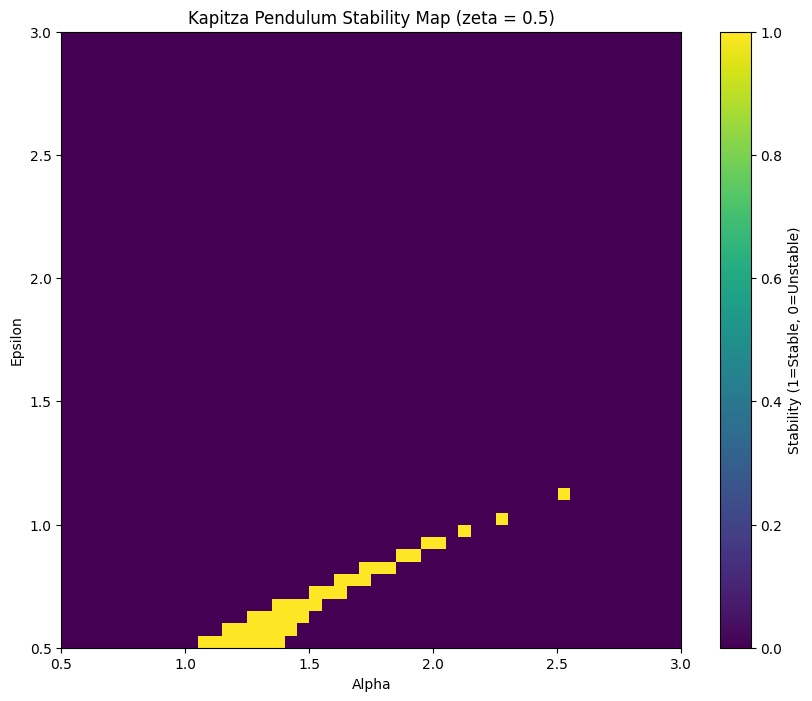

Stability map plotted!


In [12]:
# heat map creation
import matplotlib.pyplot as plt

# creating the heat map
plt.figure(figsize=(10, 8))
plt.imshow(stability_map.T, extent=[alpha_min, alpha_max, epsilon_min, epsilon_max], origin='lower', aspect='auto', cmap='viridis')

plt.colorbar(label='Stability (1=Stable, 0=Unstable)')
plt.xlabel('Alpha')
plt.ylabel('Epsilon')
plt.title('Kapitza Pendulum Stability Map (zeta = 0.5)')
plt.grid(False)
plt.show()

print("Stability map plotted!")

### **Graph a 2D stability plot:**

I previously has a simple plot but let's follow Donnie for now... especially since we're using heat/color maps instead of a plain ol' grid.

The github requirments says that we need make a heat map (our plot), find alpha(epsilon) [the approx. stability boundary], and superimpose this line on the heat map and see how well the curve line matches our data.

So... we made the heat map! At this point, I haven't messed with any of the parameters, so I'm going to just get a line set up to see if I can get it on the graph itself.

Donnie... defined a alpha_curve as being equal to `C * epsilon_values**2`

He plotted it using...

The plot required for our heat map as depicited in the above code:

Ah! Here we go, superimpose the proposed stability boundary curve...

plt.plot(alpha_critical_curve, epsilon_values, color='red', linestyle='--', linewidth=2, label=rf'Proposed Boundary: $\alpha \approx {C:.2f}\epsilon^2$')

Then he added labels and a title. plt.grid is still false, there's a plt.legend() and a plt.show()

Then he ended it with some print stuff but I will ignore it since it's just a completion sentence and further explanation.

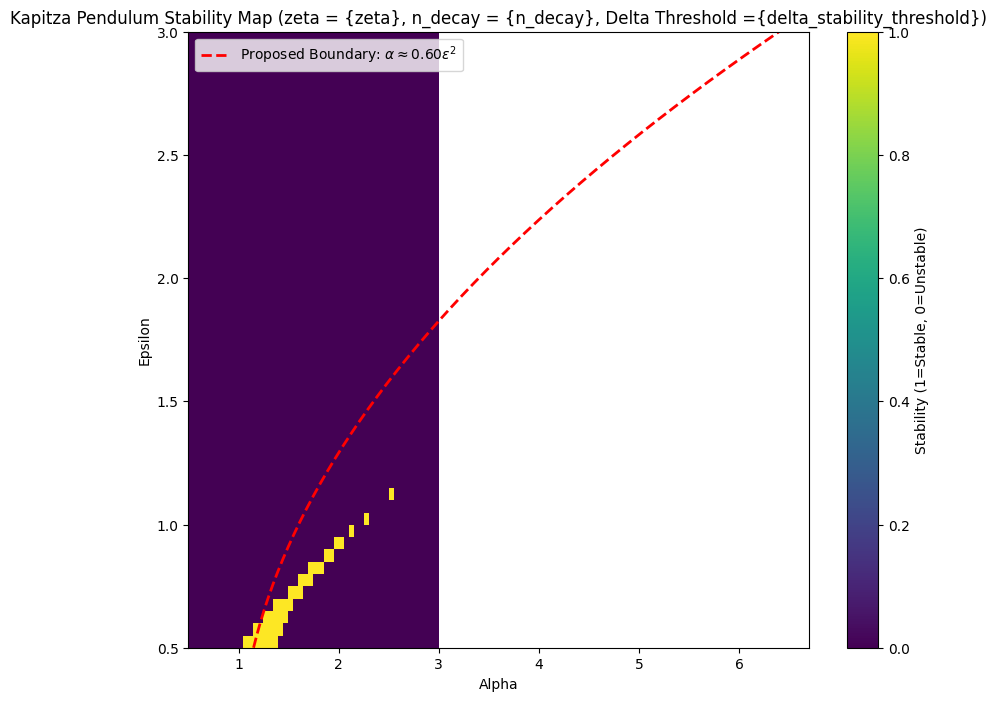

Stability map plotted with a red alpha curve!


In [18]:
import numpy as np
import matplotlib.pyplot as plt

# assumptions made: alpha_values, epsilon_values, alpha/epsilon_min, alpha/epsilon_max, stability_map,
#  zeta, n_decay, and delta_stability_threshold are DEFINED (from previous cells)

# defined coefficient
C = 0.6 # our random* coefficient
# defined alpha curve ; I added 1 to the value so I could see the line closer to the data that's reading as stable!!!
alpha_curve = (C * epsilon_values**2) + 1

# plotting our heat map!
plt.figure(figsize=(10, 8))
plt.imshow(stability_map.T, extent=[alpha_min, alpha_max, epsilon_min, epsilon_max], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Stability (1=Stable, 0=Unstable)')

# Superimposing the curve
plt.plot(alpha_curve, epsilon_values, color='red', linestyle='--', linewidth=2, label=rf'Proposed Boundary: $\alpha \approx {C:.2f}\epsilon^2$')

# adding labels/title
plt.xlabel('Alpha')
plt.ylabel('Epsilon')
plt.title('Kapitza Pendulum Stability Map (zeta = {zeta}, n_decay = {n_decay}, Delta Threshold ={delta_stability_threshold})')
plt.grid(False)
plt.legend()
plt.show()

# print statements
print("Stability map plotted with a red alpha curve!")


Looks like it exists!! Omg, so exciting-- I suppose next is getting the line to fit with my data.

First, I'll mess with the data and integration so that I could get more data points perhaps, and then I'll focus on the alpha curve (since that's only one changing point)